In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use("science")

: 

In [ ]:
from madminer import sampling
from madminer.sampling import SampleAugmenter

import yaml
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)

data_input_dir = workflow["sampling"]["input_dir"]
sig_precode = "delphes_s" 
bkg_precode = "delphes_b0"

: 

In [5]:
sampler_sig = SampleAugmenter(f'{data_input_dir}/{sig_precode}_shuffled_100TeV.h5')

x_sm = sampler_sig.sample_test(
        theta=sampling.benchmark("sm"),
        n_samples=36000,
        sample_only_from_closest_benchmark=True,
        validation_split = 0.0,
        test_split = 0.5)[0]

x_alt_1 = sampler_sig.sample_test(
        theta=sampling.morphing_point((5, 0, 0)),
        n_samples=50000,
        sample_only_from_closest_benchmark=True,
        validation_split = 0.0,
        test_split = 0.5)[0]


x_alt_2 = sampler_sig.sample_test(
        theta=sampling.morphing_point((-5, 0, 0)),
        n_samples=50000,
        sample_only_from_closest_benchmark=True,
        validation_split = 0.0,
        test_split = 0.5)[0]

x_alt_3 = sampler_sig.sample_test(
        theta=sampling.morphing_point((3.79, 0.55, 2.19)),
        n_samples=50000,
        sample_only_from_closest_benchmark=True,
        validation_split = 0.0,
        test_split = 0.5)[0]
    
sampler_bkg = SampleAugmenter(f'{data_input_dir}/{bkg_precode}_shuffled_100TeV.h5')


x_bkg = sampler_bkg.sample_test(
        theta=sampling.benchmark("sm"),
        n_samples=8120,
        sample_only_from_closest_benchmark=True,
        validation_split = 0.0,
        test_split = 0.5)[0]
    
x_SM_sb = np.vstack((x_bkg, x_sm))

sets = [x_sm, x_alt_1, x_alt_2, x_bkg]
names = ["$x$ ~ SM", "$x$ ~ ($c_{\phi}$ = 5)", "$x$ ~ ($c_{\phi}$ = -5)", "$x$ ~ bkg"]

In [6]:
nb = 35

feature_labels = {
            15:"$m_\mathrm{tot}$ [GeV]",
            16:"$p_{T_{\gamma\gamma}}$ [GeV]",
            17:"$p_{T_{bb}}$ [GeV]",
            10:"$\Delta R_{\gamma\gamma}$",
            9:"$\Delta R_{bb}$",
            11:"$\Delta R_{b_0 \gamma_0}$",
            12:"$\Delta R_{b_0 \gamma_1}$",
            13:"$\Delta R_{b_1 \gamma_0}$",
            14:"$\Delta R_{b_1 \gamma_1}$",
    }


feature_ranges = {
            15:[250, 1650],
            16:[0, 800],
            17:[0, 800],
            10:[0, 2.5],
            9:[0, 3],
            11:[0, 4],
            12:[0, 4],
            13:[0, 4],
            14:[0, 4],
         }

 
kwargs_dict = {
               "$x$ ~ SM":{"lw":4, "color":"navy"}, # nacy
    "$x$ ~ ($c_{\phi}$ = 5)":{ "lw":3, "color":"#4641D9",  "linestyle":(0, (1, 1))}, #41D9B3
         "$x$ ~ ($c_{\phi}$ = -5)":{ "lw":3, "color":"dodgerblue", "linestyle":"dashdot"},
            "$x$ ~ bkg":{"histtype":"stepfilled", "lw":0, "color":"black", "density":True, "alpha":0.3}
              }
    




def plot_features(samples, sample_labels, feats_to_plot, cuts = None, name = "" ):
    
    num_feats = len(feats_to_plot)

    fig, ax = plt.subplots(1, num_feats, figsize = (4*num_feats, 4), dpi = 300)

    for i, f in enumerate(feats_to_plot):
        
        for j, samp in enumerate(samples):
            
            if sample_labels[j] !=  "$x$ ~ bkg":
            
                loc_bins = np.linspace(feature_ranges[f][0], feature_ranges[f][1], nb)
                loc_centers = 0.5*(loc_bins[1:]+loc_bins[:-1])
                loc_vals, _ = np.histogram(samp[:,f], bins = loc_bins, density = True)

                ax[i].step(loc_centers, loc_vals, label = sample_labels[j], **kwargs_dict[sample_labels[j]])
            else:
                ax[i].hist(samp[:,f], bins = loc_bins, label = sample_labels[j], **kwargs_dict[sample_labels[j]])
            
            
            if cuts is not None:
                for k in cuts[i]:
                    ax[i].axvline(k, color = "black", linestyle = "dashed", lw = 3)
            
        ax[i].set_xlabel(feature_labels[f])

        ax[i].set_yticks([])

        if i > 0:
            pass
        else:   
            ax[0].legend(fontsize = 13.5)
            ax[0].set_ylabel("Density")

    plt.subplots_adjust(wspace=0, hspace=0)

    plt.savefig(f"./plots/{name}_features.pdf", dpi = 300)
    plt.show()
    plt.close()

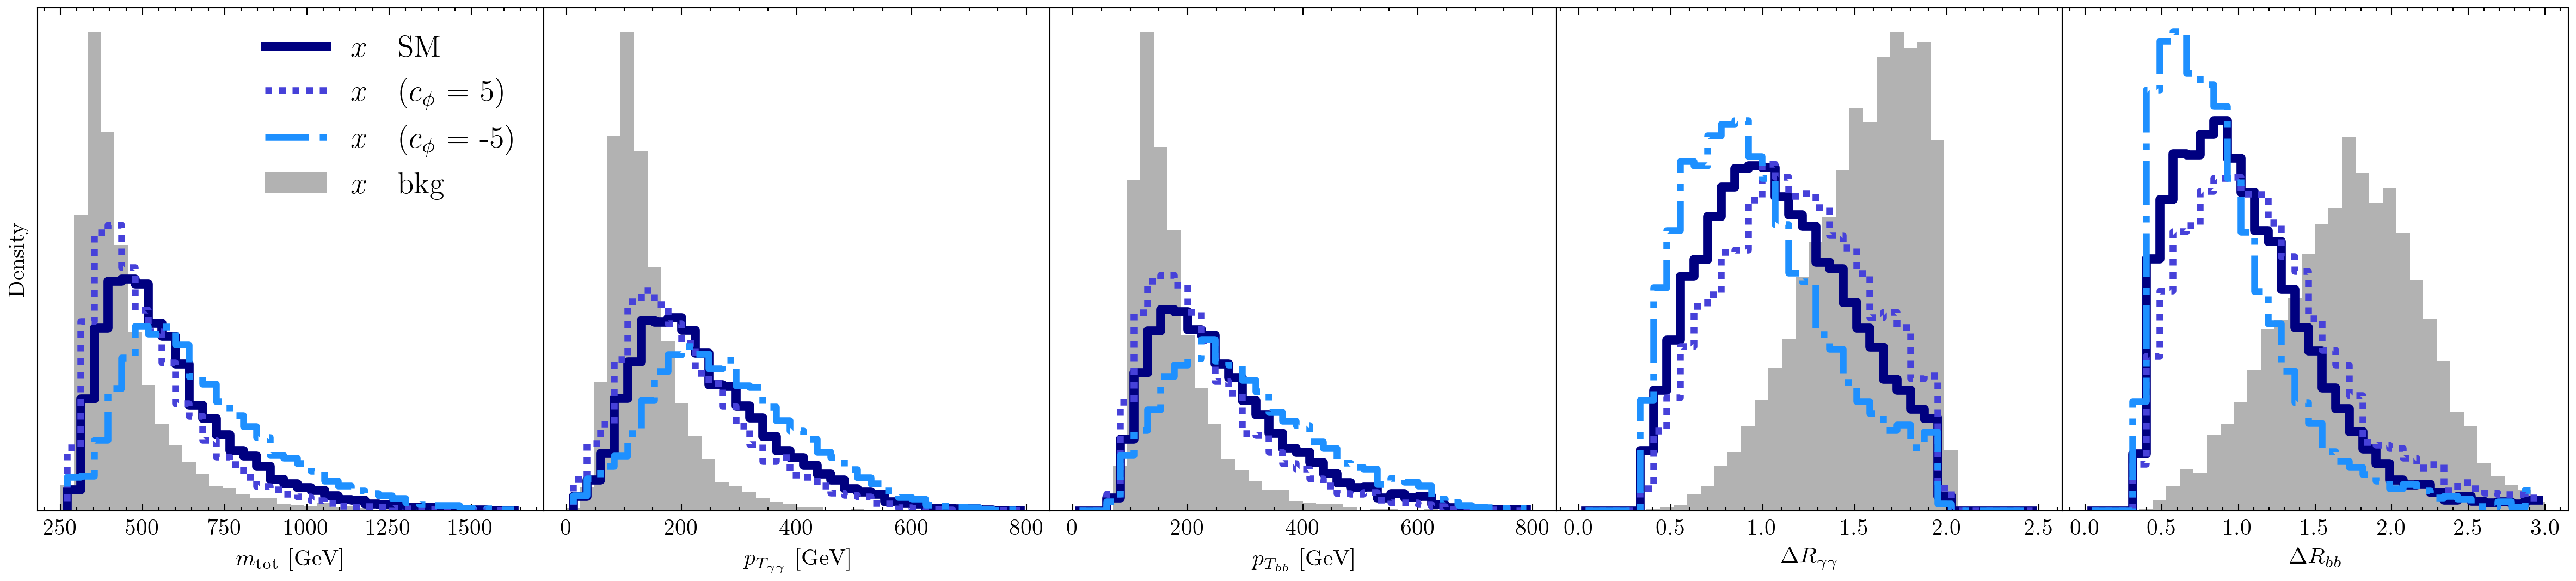

In [7]:
feats_to_plot = [15, 16, 17, 10, 9]

plot_features(sets, names, feats_to_plot, name = "core_5")